In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('paper')

# Credit to Dr. Daniel Tamayo for this code, it is example code from PHYS111 and not related to the project.

# Surfaces of Section

# (a) Time-dependent State Space

Let's write a function that calculates all our derivatives

In [ ]:
def deriv(z, t, p):
    theta, omega = z
    A = p[0]
    thetadot = omega
    omegadot = np.sin(t) - A*np.sin(theta)
    return [thetadot, omegadot]

# Test

When $\omega_0^2 = g/L$, everything is comparable, and things are quite chaotic, so it's hard to know whether we got the right answer or not. Let's test our code in a limit that we understand first.

Imagine that the pivot point is moving very slowly. In this case, the dynamics of the pendulum should be almost the same as if the pivot point wasn't moving, and we know what the state space should look like. That corresponds to a small $\omega_0$, which in turn corresponds to a large value of the only dimensionless combination of parameters that shows up in our problem

$A \equiv \frac{g}{L\omega_0^2}$

So let's set A=100 and let's make a list of times at which we want outputs. What time should we integrate up to?

Well, we've decided on time units of $T=1/\omega_0$. That means that after $T=2\pi$ we have gone to $t=2\pi/\omega_0$, corresponding to one full oscillation of the pivot point. So we don't have to go up to $T=1000$ or anything crazy...we can just integrate for a few oscillations to see the behavior. We'll choose 3 oscillations, or up to $T=3\times(2\pi)$. And let's get 1000 equally spaced times so we get a nice looking plot:

In [3]:
A = 100
p = [A]

Nout = 1000
times = np.linspace(0, 3*(2*np.pi), Nout)

Now we need to choose our initial conditions that we want to plot. Let's start our pendulum from rest ($\omega=0$), and a range of initial angles $\theta = [\pi/6, \pi/2, 5\pi/6]$. 

Odeint wants our initial conditions packaged as a pair $[\theta, \omega]$, so we'll make a list of pairs for all our initial conditions. We then make a list of solutions and append one for each of our initial conditions:

In [4]:
ics = [[np.pi/6, 0], [np.pi/2, 0], [5*np.pi/6, 0]]


sols = []
for ic in ics:
    sols.append(odeint(deriv, ic, times, args=(p,)))

(-3.141592653589793, 3.141592653589793)

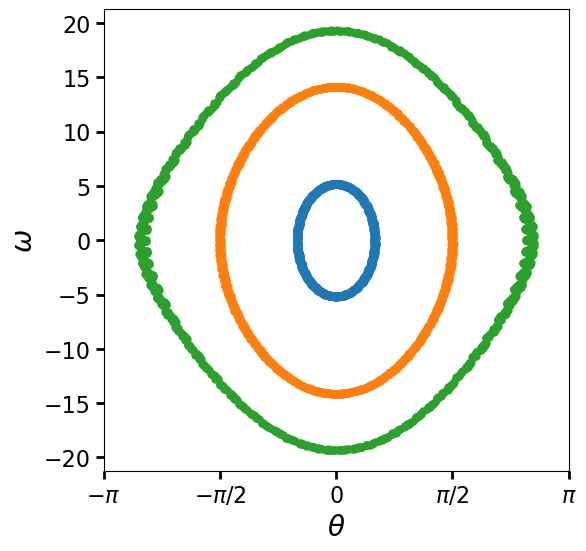

In [5]:
fig, ax = plt.subplots()
for sol in sols:
    thetas, omegas = sol.T # the solution from odeint has shape (1000 output points, 2 variables), so need to take transpose
    # this is a fancy oneliner to make an array of angles be between -pi and pi so our eq. point is in the middle
    thetas = np.mod(thetas-np.pi, 2*np.pi)-np.pi 
    ax.plot(thetas, omegas, '.')
    
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\omega$')

# make it look nice
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
ax.set_xlim([-np.pi, np.pi])

# Solution

The above looks like what we expect different trajectories (in different colors) to look like for a pendulum, so now let's choose $A=1$ like the problem asked for:

In [6]:
A = 1
p = [A]

Nout = 1000
times = np.linspace(0, 3*(2*np.pi), Nout)

In [7]:
ics = [[np.pi/6, 0], [np.pi/2, 0], [5*np.pi/6, 0]]


sols = []
for ic in ics:
    sols.append(odeint(deriv, ic, times, args=(p,)))

(-3.141592653589793, 3.141592653589793)

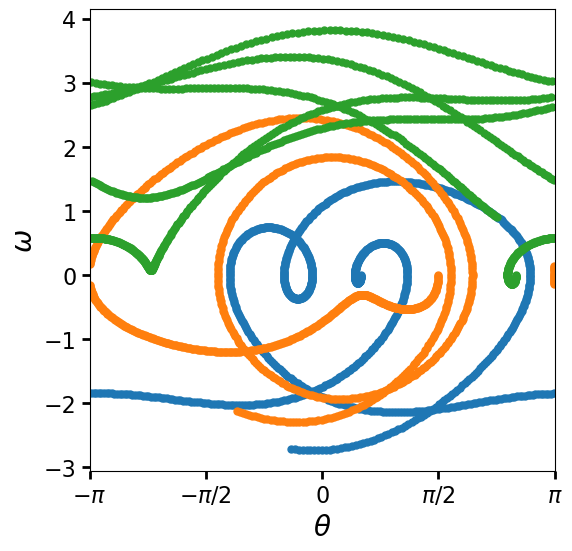

In [8]:
fig, ax = plt.subplots()
for sol in sols:
    thetas, omegas = sol.T # the solution from odeint has shape (1000 output points, 2 variables), so need to take transpose
    # this is a fancy oneliner to make an array of angles be between -pi and pi so our eq. point is in the middle
    thetas = np.mod(thetas-np.pi, 2*np.pi)-np.pi 
    ax.plot(thetas, omegas, '.')
    
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\omega$')

# make it look nice
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
ax.set_xlim([-np.pi, np.pi])

The different trajectories all cross each other, making it difficult to see what's going on.

# (b) Surface of Section

Let's test for large $A$ first again. Interestingly if you choose too large an A, the default solver in Odeint will fail and the solution will blow up. So let's chooose A=5:

In [9]:
A = 5
p = [A]

The idea of thinking of time as an angle $\theta_2$ is to help visualize things in terms of the donut picture we drew in class as described in the problem statement, and because it helps us see that time is periodic in the sense that every $2\pi$ the pivot is back to the same position. But the solution to the third ODE is just $\theta_2 = t$, so to get our surface of section, we could simply ask Odeint to integrate to the set of times

t = $[0, 2\pi, 4\pi, ...]$

and just store what $\theta$ and $\omega$ are at those particular times when we're crossing our section to plot them. So let's make such a list of times and print the first 5 to check:

In [10]:
Nout = 1000
times = [2*np.pi*n for n in range(Nout)]
times[:5]

[0.0,
 6.283185307179586,
 12.566370614359172,
 18.84955592153876,
 25.132741228718345]

Now we again choose a set of initial conditions to track trajectories for (we'll use the same ones), and pass our new special set of times at which we cross the section and we want outputs:

In [11]:
ics = [[np.pi/6, 0], [np.pi/2, 0], [5*np.pi/6, 0]]


sols = []
for ic in ics:
    sols.append(odeint(deriv, ic, times, args=(p,)))

(-3.141592653589793, 3.141592653589793)

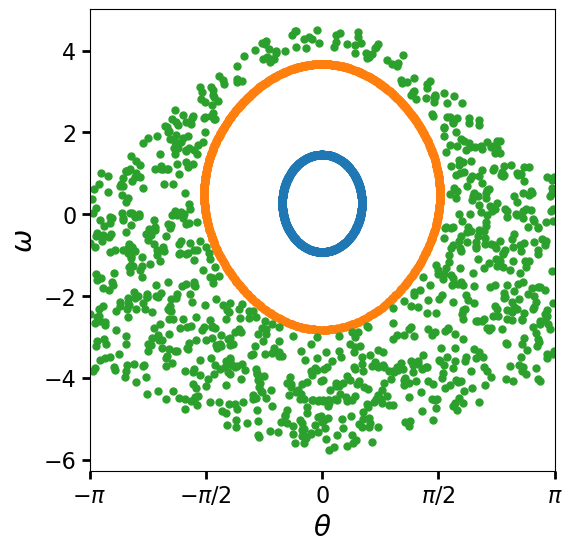

In [12]:
fig, ax = plt.subplots()
for sol in sols:
    thetas, omegas = sol.T # the solution from odeint has shape (1000 output points, 2 variables), so need to take transpose
    # this is a fancy oneliner to make an array of angles be between -pi and pi so our eq. point is in the middle
    thetas = np.mod(thetas-np.pi, 2*np.pi)-np.pi 
    ax.plot(thetas, omegas, '.')
    
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\omega$')

# make it look nice
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
ax.set_xlim([-np.pi, np.pi])

We see we get 2 nice quasi-periodic solutions that trace a 1-D line (for the blue and orange initial conditions), whereas our green initial condition (which was the one with $\theta_0 = 5\pi/6$, closest to the unstable equilibrium at $\theta = \pi$) is chaotic and fills up a 2-D space.

# Solution

In [13]:
A = 1
p = [A]

In [14]:
Nout = 1000
times = [2*np.pi*n for n in range(Nout)]

In [15]:
ics = [[np.pi/6, 0], [np.pi/2, 0], [5*np.pi/6, 0]]


sols = []
for ic in ics:
    sols.append(odeint(deriv, ic, times, args=(p,)))

(-3.141592653589793, 3.141592653589793)

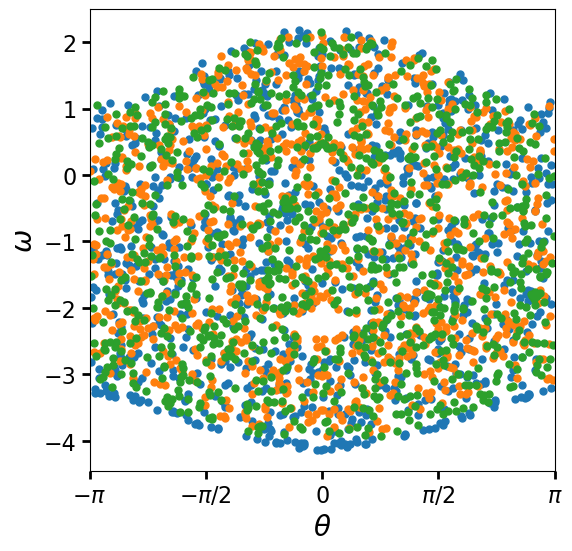

In [16]:
fig, ax = plt.subplots()
for sol in sols:
    thetas, omegas = sol.T # the solution from odeint has shape (1000 output points, 2 variables), so need to take transpose
    # this is a fancy oneliner to make an array of angles be between -pi and pi so our eq. point is in the middle
    thetas = np.mod(thetas-np.pi, 2*np.pi)-np.pi 
    ax.plot(thetas, omegas, '.')
    
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\omega$')

# make it look nice
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
ax.set_xlim([-np.pi, np.pi])

For $A$=1, the frequencies of the pivot and the pendulum (for small oscillations) are equal, so everything is changing on the same timescale and most initial conditions are chaotic (fill a 2D space).

It looks like there are a few islands where the chaotic trajectories are not entering, e.g., near $(-\pi/2, -0.5)$, which suggest that if we started with initial conditions there, we would likely see quasi-periodic solutions that stay in that region. Would be fun to explore for this problem and for similar cases in your computational project!